In [5]:
import nibabel as nib
import os
import numpy as np

In [2]:
def filter_slices(image, axis, background_value):
    """
    Filters out slices that are entirely background along a specific axis.
    """
    non_background_slices = []
    for i in range(image.shape[axis]):
        if axis == 0:
            slice_2d = image[i, :, :]
        elif axis == 1:
            slice_2d = image[:, i, :]
        elif axis == 2:
            slice_2d = image[:, :, i]
        
        if not np.all(slice_2d == background_value):
            non_background_slices.append(i)
    
    if axis == 0:
        filtered_image = image[non_background_slices, :, :]
    elif axis == 1:
        filtered_image = image[:, non_background_slices, :]
    elif axis == 2:
        filtered_image = image[:, :, non_background_slices]
    
    return filtered_image

In [7]:
def filter_vol(input_path, background_value , output_folder):
    img = nib.load(input_path)
    vol = img.get_fdata()
    
    filtered_image = filter_slices(vol, 0, background_value)
    filtered_image = filter_slices(filtered_image, 1, background_value)
    filtered_image = filter_slices(filtered_image, 2, background_value)

    print(f"Original shape : {vol.shape}, Squeezed shape : {filtered_image.shape}")

    result_img = nib.Nifti1Image(filtered_image, img.affine, img.header)

    output_name = os.path.basename(input_path)
    output_name = os.path.splitext(output_name)[0]
    output_name = os.path.splitext(output_name)[0]
    output_name = f"{output_name}_squeezed.nii.gz"
    output_path = os.path.join(output_folder,output_name)
    nib.save(result_img, output_path)

In [8]:
input_folder = r"C:\Users\acer\Desktop\Data_Prep_2\imagesTr"
output_folder = r"C:\Users\acer\Desktop\Data_Prep_2\imagesTr\Cropped"

nii_count = len([filename for filename in os.listdir(input_folder) if filename.endswith('.nii.gz')])
print(f"There are {nii_count} .nii files in the {input_folder}")

progress_count = 0

files = sorted(os.listdir(input_folder))

for filename in files :
    if filename.endswith('.nii.gz'):
        progress_count += 1
        print(f"[Processing {progress_count} out of {nii_count}]")

        input_path = os.path.join(input_folder, filename)
        background_value = -4000

        if os.path.exists(input_path) :
            filter_vol(input_path, background_value , output_folder) # Put function here
        else:
            vol_exist = os.path.exists(volume_path)
            print(f"Error : vol {vol_exist}")

print("Done")

There are 375 .nii files in the C:\Users\acer\Desktop\Data_Prep_2\imagesTr
[Processing 1 out of 375]
Original shape : (483, 607, 607), Cropped shape : (191, 201, 385)
[Processing 2 out of 375]
Original shape : (481, 481, 481), Cropped shape : (173, 253, 335)
[Processing 3 out of 375]
Original shape : (481, 481, 481), Cropped shape : (169, 248, 288)
[Processing 4 out of 375]
Original shape : (481, 481, 481), Cropped shape : (145, 202, 284)
[Processing 5 out of 375]
Original shape : (481, 527, 527), Cropped shape : (156, 310, 308)
[Processing 6 out of 375]
Original shape : (481, 575, 577), Cropped shape : (179, 301, 306)
[Processing 7 out of 375]
Original shape : (485, 581, 583), Cropped shape : (190, 303, 396)
[Processing 8 out of 375]
Original shape : (481, 549, 549), Cropped shape : (170, 250, 397)
[Processing 9 out of 375]
Original shape : (479, 479, 481), Cropped shape : (196, 311, 326)
[Processing 10 out of 375]
Original shape : (481, 481, 481), Cropped shape : (215, 353, 339)
[Pro

This part is just to show sample result

Origin shape : (479, 479, 481), Sqeezed shape : (179, 263, 353)


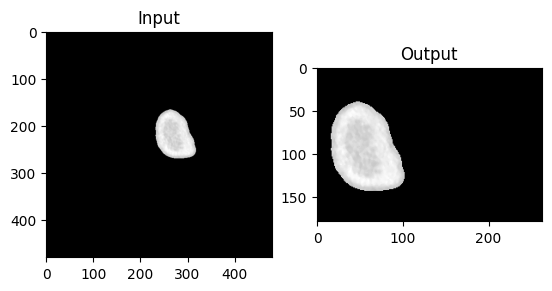

In [18]:
import nibabel as nib
from matplotlib import pyplot as plt
import numpy as np

origin_path = r"C:\Users\acer\Desktop\Data_Prep_2\imagesTr\5450_2016_02_26_L_masked.nii.gz"
origin_img = nib.load(origin_path)
origin_vol = origin_img.get_fdata()

squeezed_path = r"C:\Users\acer\Desktop\Data_Prep_2\imagesTr\Cropped\5450_2016_02_26_L_masked_cropped.nii.gz"
squeezed_img = nib.load(squeezed_path)
squeezed_vol = squeezed_img.get_fdata()

print(f"Origin shape : {origin_vol.shape}, Sqeezed shape : {squeezed_vol.shape}")

origin_slice_number = 260
squeezed_slice_number = 132

origin_slice = origin_vol[:,:,origin_slice_number]
squeezed_slice = squeezed_vol[:,:,squeezed_slice_number]

#display result
f, axarr = plt.subplots(1,2)
axarr[0].set_title("Input")
axarr[0].imshow(origin_slice, cmap = 'grey')
axarr[1].set_title("Output")
axarr[1].imshow(squeezed_slice, cmap = 'grey')